In [42]:
import numpy as np
import pandas as pd
from gudhi import CubicalComplex, bottleneck_distance
import matplotlib.pyplot as plt
from PIL import Image
import gudhi as gd
from IPython.display import display, HTML

In [43]:
# Function to extract birth-death pairs of a specific dimension
def extract_pairs(persistence, dim):
    pairs = np.array([pair[1] for pair in persistence if pair[0] == dim], dtype=np.float64)
    return pairs

# Function to compute persistence for a single image
def cubical_persistence(image_path):
    # Load grayscale image
    img = Image.open(image_path).convert('L')
    img_array = np.array(img, dtype=np.float64)
    print(f'Loaded image of shape: {img_array.shape}')

    # Create a Cubical Complex from the image
    cubical_complex = CubicalComplex(top_dimensional_cells=img_array)
    cubical_complex.compute_persistence(min_persistence=-1)
    print("Created cubical complex")

    # Get the persistence diagram
    persistence = cubical_complex.persistence()
    # Extract dimension 0 and 1 pairs separately
    dim0_pairs = extract_pairs(persistence, dim=0)
    dim1_pairs = extract_pairs(persistence, dim=1)
    return dim0_pairs, dim1_pairs

<Figure size 1800x400 with 0 Axes>

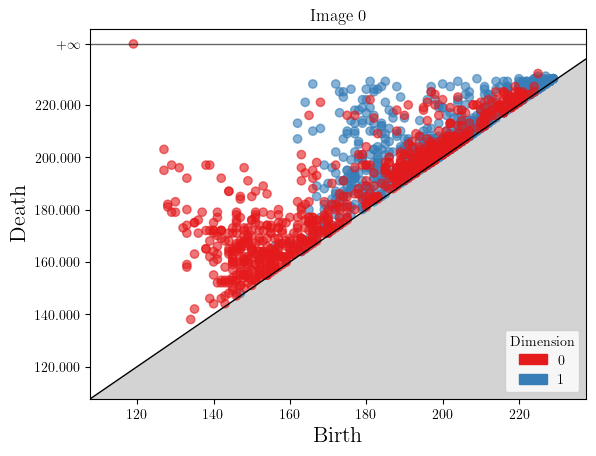

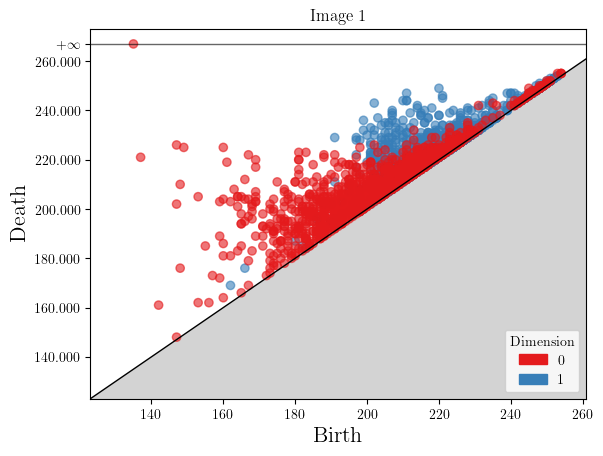

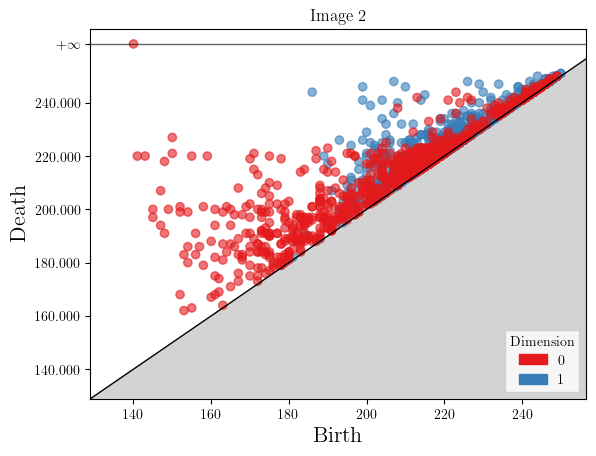

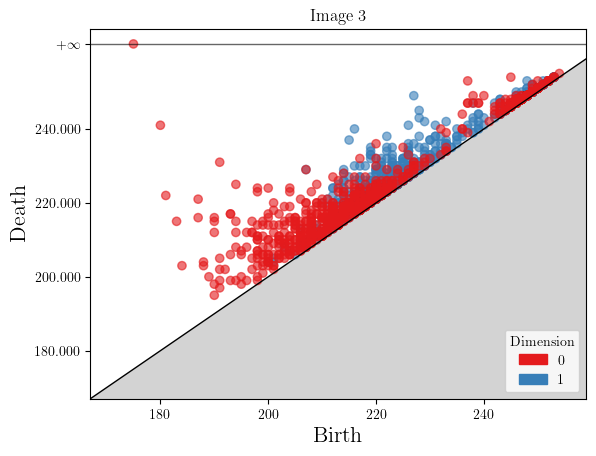

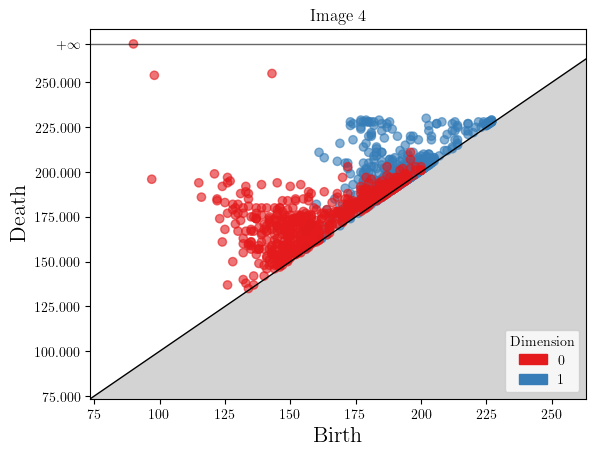

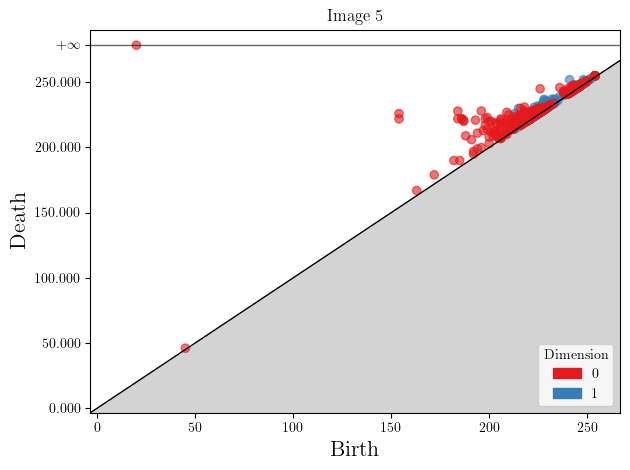

In [44]:
image_paths = [f'data/images/{i}-scaled.png' for i in range(6)]

plt.figure(figsize=(18, 4))  # Adjust size to fit 6 plots side by side

for i, path in enumerate(image_paths, 1):
    img = Image.open(path).convert('L')
    img_array = np.array(img, dtype=np.float64)
    cubical_complex = CubicalComplex(top_dimensional_cells=img_array)
    cubical_complex.compute_persistence(min_persistence=-1)
    persistence = cubical_complex.persistence()

    gd.plot_persistence_diagram(persistence)
    plt.title(f'Image {i-1}')

plt.tight_layout()
plt.show()

In [45]:
# Function to extract birth-death pairs of a specific dimension
def extract_pairs(persistence, dim):
    pairs = np.array([pair[1] for pair in persistence if pair[0] == dim], dtype=np.float64)
    return pairs

# Function to compute persistence for a single image
def compute_persistence(image_path):
    # Load grayscale image
    img = Image.open(image_path).convert('L')
    img_array = np.array(img, dtype=np.float64)
    print(f'Loaded image of shape: {img_array.shape}')

    # Create a Cubical Complex from the image
    cubical_complex = CubicalComplex(top_dimensional_cells=img_array)
    cubical_complex.compute_persistence(min_persistence=-1)
    print("Created cubical complex")

    # Get the persistence diagram
    persistence = cubical_complex.persistence()
    # Extract dimension 0 and 1 pairs separately
    dim0_pairs = extract_pairs(persistence, dim=0)
    dim1_pairs = extract_pairs(persistence, dim=1)
    return dim0_pairs, dim1_pairs

# Parameters for shifting and clamping
shift = 0.1
max_val0 = 1.0
max_val1 = 1.0
cmap0 = plt.cm.Blues
cmap1 = plt.cm.Reds

# Convert RGBA to HEX
def color_to_hex(color):
    return '#{:02x}{:02x}{:02x}'.format(
        int(color[0] * 255), int(color[1] * 255), int(color[2] * 255)
    )

# List of image paths
data_path = 'data/images/'
image_paths = [f'{data_path}{i}-scaled.png' for i in range(6)]

# Compute persistence diagrams
persistence_diagrams = {path: compute_persistence(path) for path in image_paths}
names = list(persistence_diagrams.keys())
df = pd.DataFrame(index=names, columns=names, dtype=object)

# Find the maximum distance for color scaling
all_distances0 = []
all_distances1 = []
for name1 in names:
    for name2 in names:
        dim0_1, dim1_1 = persistence_diagrams[name1]
        dim0_2, dim1_2 = persistence_diagrams[name2]

        dist0 = bottleneck_distance(dim0_1, dim0_2)
        dist1 = bottleneck_distance(dim1_1, dim1_2)

        all_distances0.append(dist0)
        all_distances1.append(dist1)

max_dist0 = max(all_distances0) if all_distances0 else 1.0
max_dist1 = max(all_distances1) if all_distances1 else 1.0

# Compute bottleneck distances and visualize
for name1 in names:
    for name2 in names:
        dim0_1, dim1_1 = persistence_diagrams[name1]
        dim0_2, dim1_2 = persistence_diagrams[name2]

        dist0 = bottleneck_distance(dim0_1, dim0_2)
        dist1 = bottleneck_distance(dim1_1, dim1_2)

        # Scale the colors based on maximum distance
        clipped0 = dist0 / max_dist0
        clipped1 = dist1 / max_dist1

        # Map distances to colors
        color0 = color_to_hex(cmap0(clipped0))
        color1 = color_to_hex(cmap1(clipped1))

        df.loc[name1, name2] = (
            f"<div style='display:flex; flex-direction: column; gap: 2px;'>"
            f"<div style='background:{color0}; padding:4px; border-radius:4px; text-align:center; color: white;'>"
            f"<b>dim0:</b> {dist0:.3f}</div>"
            f"<div style='background:{color1}; padding:4px; border-radius:4px; text-align:center; color: white;'>"
            f"<b>dim1:</b> {dist1:.3f}</div>"
            f"</div>"
        )

# Display the styled DataFrame
display(HTML(df.to_html(escape=False)))


Loaded image of shape: (435, 121)
Created cubical complex
Loaded image of shape: (88, 644)
Created cubical complex
Loaded image of shape: (529, 102)
Created cubical complex
Loaded image of shape: (363, 411)
Created cubical complex
Loaded image of shape: (354, 297)
Created cubical complex
Loaded image of shape: (187, 136)
Created cubical complex


,data/images/0-scaled.png,data/images/1-scaled.png,data/images/2-scaled.png,data/images/3-scaled.png,data/images/4-scaled.png,data/images/5-scaled.png
data/images/0-scaled.png,dim0: 0.000dim1: 0.000,dim0: 24.000dim1: 25.000,dim0: 21.000dim1: 23.000,dim0: 56.000dim1: 31.000,dim0: 51.000dim1: 7.000,dim0: 99.000dim1: 31.000
data/images/1-scaled.png,dim0: 24.000dim1: 25.000,dim0: 0.000dim1: 0.000,dim0: 11.000dim1: 13.000,dim0: 42.000dim1: 16.000,dim0: 45.000dim1: 24.000,dim0: 115.000dim1: 19.000
data/images/2-scaled.png,dim0: 21.000dim1: 23.000,dim0: 11.000dim1: 13.000,dim0: 0.000dim1: 0.000,dim0: 39.000dim1: 21.000,dim0: 50.000dim1: 23.000,dim0: 120.000dim1: 26.000
data/images/3-scaled.png,dim0: 56.000dim1: 31.000,dim0: 42.000dim1: 16.000,dim0: 39.000dim1: 21.000,dim0: 0.000dim1: 0.000,dim0: 85.000dim1: 27.000,dim0: 155.000dim1: 10.000
data/images/4-scaled.png,dim0: 51.000dim1: 7.000,dim0: 45.000dim1: 24.000,dim0: 50.000dim1: 23.000,dim0: 85.000dim1: 27.000,dim0: 0.000dim1: 0.000,dim0: 70.000dim1: 27.500
data/images/5-scaled.png,dim0: 99.000dim1: 31.000,dim0: 115.000dim1: 19.000,dim0: 120.000dim1: 26.000,dim0: 155.000dim1: 10.000,dim0: 70.000dim1: 27.500,dim0: 0.000dim1: 0.000
